# E-Learning Dataset and Recommandation System

####  1- Importing the necessary library 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go 

In [3]:
import warnings
warnings.filterwarnings('ignore')

#### 1-1 Import the dataset

In [4]:
courses_data = pd.read_csv("Dataset_ELearning.csv")

#### 1-2 Viewing the data

In [5]:
length =courses_data.shape[0]
print(length)

11871


In [6]:
courses_data.columns

Index(['Year', 'Term', 'YearTerm', 'Subject', 'Number', 'Name', 'Description',
       'Credit Hours', 'Section Info', 'Degree Attributes',
       'Schedule Information', 'CRN', 'Section', 'Status Code', 'Part of Term',
       'Section Title', 'Section Credit Hours', 'Section Status',
       'Enrollment Status', 'Type', 'Type Code', 'Start Time', 'End Time',
       'Days of Week', 'Room', 'Building', 'Instructors'],
      dtype='object')

In [7]:
results = courses_data.dtypes
print(results)

Year                     int64
Term                    object
YearTerm                object
Subject                 object
Number                   int64
Name                    object
Description             object
Credit Hours            object
Section Info            object
Degree Attributes       object
Schedule Information    object
CRN                      int64
Section                 object
Status Code             object
Part of Term            object
Section Title           object
Section Credit Hours    object
Section Status          object
Enrollment Status       object
Type                    object
Type Code               object
Start Time              object
End Time                object
Days of Week            object
Room                    object
Building                object
Instructors             object
dtype: object


In [8]:
courses_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11871 entries, 0 to 11870
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  11871 non-null  int64 
 1   Term                  11871 non-null  object
 2   YearTerm              11871 non-null  object
 3   Subject               11871 non-null  object
 4   Number                11871 non-null  int64 
 5   Name                  11871 non-null  object
 6   Description           11870 non-null  object
 7   Credit Hours          11871 non-null  object
 8   Section Info          10740 non-null  object
 9   Degree Attributes     2765 non-null   object
 10  Schedule Information  3726 non-null   object
 11  CRN                   11871 non-null  int64 
 12  Section               10804 non-null  object
 13  Status Code           11871 non-null  object
 14  Part of Term          11735 non-null  object
 15  Section Title         1386 non-null 

In [9]:
courses_data.duplicated().sum()

10

In [10]:
courses_data.isnull().sum()

Year                        0
Term                        0
YearTerm                    0
Subject                     0
Number                      0
Name                        0
Description                 1
Credit Hours                0
Section Info             1131
Degree Attributes        9106
Schedule Information     8145
CRN                         0
Section                  1067
Status Code                 0
Part of Term              136
Section Title           10485
Section Credit Hours     9262
Section Status              0
Enrollment Status           0
Type                        0
Type Code                   0
Start Time                  0
End Time                 2209
Days of Week             2210
Room                     2346
Building                 2346
Instructors               755
dtype: int64

In [11]:
courses_data.nunique()

Year                        1
Term                        1
YearTerm                    1
Subject                   178
Number                    523
Name                     2994
Description              3886
Credit Hours               78
Section Info             2962
Degree Attributes          51
Schedule Information      246
CRN                     11168
Section                  2051
Status Code                 2
Part of Term                5
Section Title             955
Section Credit Hours       11
Section Status              2
Enrollment Status           1
Type                       11
Type Code                  73
Start Time                 39
End Time                   96
Days of Week               32
Room                      545
Building                  104
Instructors              4218
dtype: int64

In [12]:
courses_data.describe()

,Year,Number,CRN
count,11871.0,11871.000000,11871.000000
mean,2016.0,329.314632,47094.128212
std,0.0,172.394516,14430.422250
min,2016.0,2.000000,10001.000000
25%,2016.0,192.500000,35750.000000
50%,2016.0,312.000000,47599.000000
75%,2016.0,480.000000,60159.000000
max,2016.0,798.000000,67692.000000


In [13]:
#check numerical data  types

numerical_columns = courses_data.select_dtypes(include=['int64','float64']).columns

print("Numerical Columns: ")
for column in numerical_columns:
    unique_values = courses_data[column].unique()
    print(f"{column}: {unique_values}")

#Check Object data types 
object_columns = courses_data.select_dtypes(include=['object']).columns
print("\n Object Columns :")
for column in object_columns:
    unique_values = courses_data[column].unique()
    print(f"{column}: {unique_values}")

Numerical Columns: 
Year: [2016]
Number: [100 200 246 258 287 297 300 310 370 375 390 402 199 223 224 341 361 397
 430 440 445 454 455 459 463 466 482 488 497 498 501 594 597 599 201 202
 290 301 302 303 304 312 321 352 353 398 405 410 415 451 499 500 502 503
 504 505 510 511 512 515 517 518 551 552 554 556 558 570 571 585 592 593
 161 210 222 240 251 255 261 293 294 295 306 345 346 396 406 411 427 428
 432 435 444 452 471 496 520 531 562 564 569 591 101 179 298 299 409 509
 150 281 283 284 311 350 400 460 483 490 495 550 580 582 587 590 598 323
 395 412 416 420 433 442 456 468 528 542 102 111 221 331 132 226 227 259
 272 382 383 421 231 266 110 220 270 230 260 280 340 380 480 549 125 292
 365 399 494 285 103 206 207 219 250 305 307 313 314 401 431 437 441 449
 467 523 525 526 533 104 108 130 143 160 180 182 241 242 277 360 391 408
 423 514 561 589 403 407 413 271 342 351 373 417 424 475 476 491 519 544
 560 572 573 574 576 577 595 105 140 151 153 154 191 209 218 225 262 328
 363 371 4

#### 2- Preprocess the data 

##### 2-1 Removing duplicates rows

In [14]:
courses_data.drop_duplicates()

,Year,Term,YearTerm,Subject,Number,Name,Description,Credit Hours,Section Info,Degree Attributes,...,Section Status,Enrollment Status,Type,Type Code,Start Time,End Time,Days of Week,Room,Building,Instructors
0,2016,Fall,2016-fa,AAS,100,Intro Asian American Studies,Interdisciplinary introduction to the basic co...,3 hours.,NaN,"Social Sciences, and US Minority Culture(s) co...",...,A,UNKNOWN,Discussion/Recitation,DIS,10:00 AM,10:50 AM,W,103,Bevier Hall,"Chung, G;Rana, J"
1,2016,Fall,2016-fa,AAS,100,Intro Asian American Studies,Interdisciplinary introduction to the basic co...,3 hours.,NaN,"Social Sciences, and US Minority Culture(s) co...",...,A,UNKNOWN,Discussion/Recitation,DIS,11:00 AM,11:50 AM,W,103,Bevier Hall,"Chung, G;Rana, J"
2,2016,Fall,2016-fa,AAS,100,Intro Asian American Studies,Interdisciplinary introduction to the basic co...,3 hours.,NaN,"Social Sciences, and US Minority Culture(s) co...",...,A,UNKNOWN,Discussion/Recitation,DIS,12:00 PM,12:50 PM,W,103,Bevier Hall,"Lee, J;Rana, J"
3,2016,Fall,2016-fa,AAS,100,Intro Asian American Studies,Interdisciplinary introduction to the basic co...,3 hours.,NaN,"Social Sciences, and US Minority Culture(s) co...",...,A,UNKNOWN,Discussion/Recitation,DIS,1:00 PM,1:50 PM,W,103,Bevier Hall,"Lee, J;Rana, J"
4,2016,Fall,2016-fa,AAS,100,Intro Asian American Studies,Interdisciplinary introduction to the basic co...,3 hours.,NaN,"Social Sciences, and US Minority Culture(s) co...",...,A,UNKNOWN,Discussion/Recitation,DIS,2:00 PM,2:50 PM,W,103,Bevier Hall,"Atienza, P;Rana, J"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11866,2016,Fall,2016-fa,YDSH,103,Intermediate Yiddish I,Continuation of YDSH 102. Develops more advanc...,4 hours.,Prerequisite: YDSH 102 or equivalent placement...,NaN,...,A,UNKNOWN,Lecture-Discussion,LCD,9:00 AM,9:50 AM,MTWR,ARR,English Building,"Feldman, S"
11867,2016,Fall,2016-fa,YDSH,220,Jewish Storytelling,Course will introduce the great Jewish storyte...,3 hours.,"Same as CWL 221, ENGL 223, and RLST 220.","Literature and the Arts, and Western Compartv ...",...,A,UNKNOWN,Lecture-Discussion,LCD,11:00 AM,12:20 PM,MW,150,English Building,"Harris, R"
11868,2016,Fall,2016-fa,YDSH,320,Lit Responses to the Holocaust,Course introduces a variety of Jewish literary...,3 hours.,"Same as CWL 320, ENGL 359, and RLST 320.","Literature and the Arts, and Western Compartv ...",...,A,UNKNOWN,Lecture-Discussion,LCD,12:30 PM,1:50 PM,TR,G46,Foreign Languages Building,"Anderson Bliss, J"
11869,2016,Fall,2016-fa,ZULU,201,Elementary Zulu I,"Introduction to Zulu; emphasis on grammar, pro...",5 hours.,Same as AFST 251. Participation in the languag...,NaN,...,A,UNKNOWN,Lecture-Discussion,LCD,11:30 AM,12:50 PM,M,127,English Building,"Madela, M;Saadah, E"


In [15]:
print(courses_data['Year'].unique())

[2016]


In [16]:
print(courses_data['Term'].unique())

['Fall']


C/C this data is collected dring one year 2016

Data collected in FAll during 2016

#### 2-2 Remove useless Columns

In [17]:
courses_df = courses_data.drop(columns=['YearTerm','Enrollment Status','Type Code'])
courses_df.head(2)

,Year,Term,Subject,Number,Name,Description,Credit Hours,Section Info,Degree Attributes,Schedule Information,...,Section Title,Section Credit Hours,Section Status,Type,Start Time,End Time,Days of Week,Room,Building,Instructors
0,2016,Fall,AAS,100,Intro Asian American Studies,Interdisciplinary introduction to the basic co...,3 hours.,NaN,"Social Sciences, and US Minority Culture(s) co...",NaN,...,NaN,NaN,A,Discussion/Recitation,10:00 AM,10:50 AM,W,103,Bevier Hall,"Chung, G;Rana, J"
1,2016,Fall,AAS,100,Intro Asian American Studies,Interdisciplinary introduction to the basic co...,3 hours.,NaN,"Social Sciences, and US Minority Culture(s) co...",NaN,...,NaN,NaN,A,Discussion/Recitation,11:00 AM,11:50 AM,W,103,Bevier Hall,"Chung, G;Rana, J"


In [18]:
print(courses_df['Schedule Information'].unique())

[nan
 'Students must register for one lab-discussion and one lecture section.'
 'Students must register for one lecture and one discussion.'
 'Students must register for one discussion and one lecture section.'
 'Students must register for one lecture/discussion section and one lab/discussion section. Not for graduate credit.'
 'Restricted to students enrolled in the MS Tax Program or MAS with Tax Concentration.'
 'Weekly participation is required in a laboratory discussion and in 1-2 hours (unscheduled) on microcomputer projects.'
 'Satisfies the ACE Ph.D. Core I requirement.'
 'Advertising majors will be given first priority.'
 'Admission based on successful completion of special project.'
 'Students must register for lab and lecture-discussion sections.'
 'Students must register in the lecture and one discussion section.'
 'Students must register for one lab and one lecture section.'
 'Each week students will be guided through asynchronous lecture/background materials online, and wi

In [19]:
print(courses_df['Name'].unique())

['Intro Asian American Studies' 'U.S. Race and Empire'
 'Asian American Youth in Film' ... 'Fundamentals of Management'
 'Issues in Tutoring Writing' 'Intermediate Yiddish I']


In [20]:
print(courses_df['Credit Hours'].unique())

['3 hours.' '4 hours.' '1 hours.' '1 TO 5 hours.' '2 hours.'
 '1 TO 4 hours.' '3 OR 4 hours.' '0 hours.' '0 TO 16 hours.'
 '0 TO 3 hours.' '2 TO 4 hours.' '1 OR 4 hours.' '1 TO 8 hours.'
 '1 OR 2 hours.' '1 TO 3 hours.' '3 TO 4 hours.' '4 TO 12 hours.'
 '0 TO 8 hours.' '0 TO 5 hours.' '1 TO 9 hours.' '0 TO 18 hours.'
 '1 to 5 hours.' '0 TO 1 hours.' '6 hours.' '0 TO 6 hours.' '5 hours.'
 '2 OR 4 hours.' '1 TO 6 hours.' '0 TO 2 hours.' '4 TO 16 hours.'
 '0 TO 4 hours.' '1 to 4 hours.' '0 TO 12 hours.' '2 TO 5 hours.'
 '2 TO 8 hours.' '2 TO 6 hours.' '2 TO 12 hours.' '2 TO 16 hours.'
 '1 TO 16 hours.' '3 or 4 hours.' '2 TO 10 hours.' '1 TO 2 hours.'
 '1 TO 10 hours.' '1 TO 12 hours.' '2 OR 3 hours.' '8 hours.'
 '4 TO 8 hours.' '0 TO 20 hours.' '0 to 4 hours.' '3 TO 6 hours.'
 '0.5 TO 2 hours.' '0.5 TO 3 hours.' '1 OR 3 hours.' '1 to 3 hours.'
 '0 TO 9 hours.' '6 OR 12 hours.' '2 or 3 hours.' '3 OR 6 hours.'
 '4 OR 5 hours.' '2 TO 3 hours.' '0 TO 10 hours.' '0 TO 15 hours.'
 '.5 to 5 hour

#### 2-3 Classify the data

In [21]:
courses_df =courses_df.sort_values(by=['Name','Type'])
courses_df.head(2)

,Year,Term,Subject,Number,Name,Description,Credit Hours,Section Info,Degree Attributes,Schedule Information,...,Section Title,Section Credit Hours,Section Status,Type,Start Time,End Time,Days of Week,Room,Building,Instructors
4417,2016,Fall,ENGL,429,18th Century Fiction,Focused study of British and Anglophone fictio...,3 OR 4 hours.,3 undergraduate hours. 4 graduate hours. Prere...,NaN,NaN,...,NaN,4 hours,A,Lecture-Discussion,1:00 PM,1:50 PM,MWF,115,English Building,"Pollock, A"
4418,2016,Fall,ENGL,429,18th Century Fiction,Focused study of British and Anglophone fictio...,3 OR 4 hours.,3 undergraduate hours. 4 graduate hours. Prere...,NaN,NaN,...,NaN,3 hours,A,Lecture-Discussion,1:00 PM,1:50 PM,MWF,115,English Building,"Pollock, A"


In [22]:
print(courses_df['Section'].unique())

['1G' '1U' 'G4' ... 'X5' 'X6' 'BE']


#### 2-4 Handle missing values


In [23]:
# creating bool series True for NaN values 
bool_series = pd.isnull(courses_df["Description"]) 
    
# filtering data 
# displaying data only with Description= NaN 
courses_df[bool_series].head(10)

,Year,Term,Subject,Number,Name,Description,Credit Hours,Section Info,Degree Attributes,Schedule Information,...,Section Title,Section Credit Hours,Section Status,Type,Start Time,End Time,Days of Week,Room,Building,Instructors
3327,2016,Fall,CWL,593,Special Studies,NaN,1 TO 4 hours.,NaN,NaN,NaN,...,NaN,NaN,A,Independent Study,ARRANGED,NaN,NaN,NaN,NaN,NaN


In [24]:
courses_df.dropna(subset = ['Description']) 

,Year,Term,Subject,Number,Name,Description,Credit Hours,Section Info,Degree Attributes,Schedule Information,...,Section Title,Section Credit Hours,Section Status,Type,Start Time,End Time,Days of Week,Room,Building,Instructors
4417,2016,Fall,ENGL,429,18th Century Fiction,Focused study of British and Anglophone fictio...,3 OR 4 hours.,3 undergraduate hours. 4 graduate hours. Prere...,NaN,NaN,...,NaN,4 hours,A,Lecture-Discussion,1:00 PM,1:50 PM,MWF,115,English Building,"Pollock, A"
4418,2016,Fall,ENGL,429,18th Century Fiction,Focused study of British and Anglophone fictio...,3 OR 4 hours.,3 undergraduate hours. 4 graduate hours. Prere...,NaN,NaN,...,NaN,3 hours,A,Lecture-Discussion,1:00 PM,1:50 PM,MWF,115,English Building,"Pollock, A"
10512,2016,Fall,RUSS,418,18th Century Literature,Reading of texts; historical and literary back...,3 OR 4 hours.,3 undergraduate hours. 4 graduate hours.,NaN,NaN,...,NaN,4 hours,A,Lecture-Discussion,2:00 PM,4:20 PM,W,1020,Lincoln Hall,"Sobol, V"
10513,2016,Fall,RUSS,418,18th Century Literature,Reading of texts; historical and literary back...,3 OR 4 hours.,3 undergraduate hours. 4 graduate hours.,NaN,NaN,...,NaN,3 hours,A,Lecture-Discussion,2:00 PM,4:20 PM,W,1020,Lincoln Hall,"Sobol, V"
5383,2016,Fall,GER,573,18thC German Studies,"Seminar in selected genres, themes, or authors...",4 hours.,May be repeated to a maximum of 12 hours if to...,NaN,NaN,...,NaN,NaN,A,Lecture-Discussion,3:00 PM,4:20 PM,MW,1040,Foreign Languages Building,"Niekerk, C"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5648,2016,Fall,HDFS,529,Youth and Family Acculturation,Examines acculturation in youth and families r...,2 hours.,Prerequisite: Prior coursework in family studi...,NaN,NaN,...,NaN,NaN,A,Lecture-Discussion,2:00 PM,4:50 PM,T,242,Bevier Hall,"Ferguson, G"
3438,2016,Fall,EALC,132,Zen,Same as RLST 132. See RLST 132.,3 hours.,Same as RLST 132. See RLST 132.,"Hist&Philosoph Perspect, and Non-Western Cultu...",NaN,...,NaN,3 hours,A,Lecture-Discussion,2:00 PM,4:50 PM,F,311,Gregory Hall,"Mayer, A"
10402,2016,Fall,RLST,132,Zen,"Introduces the history, teachings, and practic...",3 hours.,Same as EALC 132.,"Hist&Philosoph Perspect, and Non-Western Cultu...",NaN,...,NaN,3 hours,A,Lecture-Discussion,2:00 PM,4:50 PM,F,311,Gregory Hall,"Mayer, A"
11833,2016,Fall,VCM,686,ZooMed: What is Your Diagnosis,"A series of interactive, non-domestic animal c...",1 hours.,Approved for S/U grading only. May be repeated...,NaN,NaN,...,NaN,1 hours,A,Lecture-Discussion,5:00 PM,5:50 PM,MW,100,Veterinary Teaching Hospital,"Welle, K;Whittington, J"


In [25]:
resultat = courses_df.loc[courses_df['Description'] == 'NaN']

# Affichage des lignes sélectionnées
resultat.head(2)

,Year,Term,Subject,Number,Name,Description,Credit Hours,Section Info,Degree Attributes,Schedule Information,...,Section Title,Section Credit Hours,Section Status,Type,Start Time,End Time,Days of Week,Room,Building,Instructors


In [26]:
# creating bool series True for NaN values 
bool_series = pd.isnull(courses_df["Section Info"]) 
    
# filtering data 
# displaying data only with Section Info = NaN 
courses_df[bool_series].head(2)

,Year,Term,Subject,Number,Name,Description,Credit Hours,Section Info,Degree Attributes,Schedule Information,...,Section Title,Section Credit Hours,Section Status,Type,Start Time,End Time,Days of Week,Room,Building,Instructors
5737,2016,Fall,HIST,259,20thC World from Midcentury,"Economic, social, political, and cultural deve...",3 hours.,NaN,"Hist&Philosoph Perspect, and Western Compartv ...",NaN,...,NaN,NaN,A,Lecture-Discussion,12:00 PM,2:50 PM,MW,302,Architecture Building,"Ali, T"
5736,2016,Fall,HIST,258,20thC World to Midcentury,"Economic, social, political, and cultural deve...",3 hours.,NaN,"Hist&Philosoph Perspect, and Western Compartv ...",NaN,...,NaN,NaN,A,Lecture,11:00 AM,12:20 PM,MW,331,Armory,"Chaplin, T;Fritzsche, P"


In [27]:
courses_df["Section Info"].fillna("No Section", inplace = True) 

resultat = courses_df.loc[courses_df['Section Info'] == 'No Section']

# Affichage des lignes sélectionnées
resultat.head(2)

,Year,Term,Subject,Number,Name,Description,Credit Hours,Section Info,Degree Attributes,Schedule Information,...,Section Title,Section Credit Hours,Section Status,Type,Start Time,End Time,Days of Week,Room,Building,Instructors
5737,2016,Fall,HIST,259,20thC World from Midcentury,"Economic, social, political, and cultural deve...",3 hours.,No Section,"Hist&Philosoph Perspect, and Western Compartv ...",NaN,...,NaN,NaN,A,Lecture-Discussion,12:00 PM,2:50 PM,MW,302,Architecture Building,"Ali, T"
5736,2016,Fall,HIST,258,20thC World to Midcentury,"Economic, social, political, and cultural deve...",3 hours.,No Section,"Hist&Philosoph Perspect, and Western Compartv ...",NaN,...,NaN,NaN,A,Lecture,11:00 AM,12:20 PM,MW,331,Armory,"Chaplin, T;Fritzsche, P"


In [28]:
# creating bool series for  Degree Attributes for NaN values 
bool_series = pd.isnull(courses_df["Degree Attributes"]) 
    
# filtering data 
# displaying data only with Degree Attributes = NaN 
courses_df[bool_series].head(2)

,Year,Term,Subject,Number,Name,Description,Credit Hours,Section Info,Degree Attributes,Schedule Information,...,Section Title,Section Credit Hours,Section Status,Type,Start Time,End Time,Days of Week,Room,Building,Instructors
4417,2016,Fall,ENGL,429,18th Century Fiction,Focused study of British and Anglophone fictio...,3 OR 4 hours.,3 undergraduate hours. 4 graduate hours. Prere...,NaN,NaN,...,NaN,4 hours,A,Lecture-Discussion,1:00 PM,1:50 PM,MWF,115,English Building,"Pollock, A"
4418,2016,Fall,ENGL,429,18th Century Fiction,Focused study of British and Anglophone fictio...,3 OR 4 hours.,3 undergraduate hours. 4 graduate hours. Prere...,NaN,NaN,...,NaN,3 hours,A,Lecture-Discussion,1:00 PM,1:50 PM,MWF,115,English Building,"Pollock, A"


We found they are 9106 values that are missing in the column Degree Attributes 


In [29]:
courses_df["Degree Attributes"].fillna("No Degree", inplace = True) 

resultat = courses_df.loc[courses_df['Degree Attributes'] == 'No Degree']

# Affichage des lignes sélectionnées
resultat.head(2)

,Year,Term,Subject,Number,Name,Description,Credit Hours,Section Info,Degree Attributes,Schedule Information,...,Section Title,Section Credit Hours,Section Status,Type,Start Time,End Time,Days of Week,Room,Building,Instructors
4417,2016,Fall,ENGL,429,18th Century Fiction,Focused study of British and Anglophone fictio...,3 OR 4 hours.,3 undergraduate hours. 4 graduate hours. Prere...,No Degree,NaN,...,NaN,4 hours,A,Lecture-Discussion,1:00 PM,1:50 PM,MWF,115,English Building,"Pollock, A"
4418,2016,Fall,ENGL,429,18th Century Fiction,Focused study of British and Anglophone fictio...,3 OR 4 hours.,3 undergraduate hours. 4 graduate hours. Prere...,No Degree,NaN,...,NaN,3 hours,A,Lecture-Discussion,1:00 PM,1:50 PM,MWF,115,English Building,"Pollock, A"


In [30]:
courses_df["Schedule Information"].fillna("No Schedule Information", inplace = True) 

resultat = courses_df.loc[courses_df['Schedule Information'] == 'No Schedule Information']

#8145 missing values 
# Affichage des lignes sélectionnées
resultat.head(2)

,Year,Term,Subject,Number,Name,Description,Credit Hours,Section Info,Degree Attributes,Schedule Information,...,Section Title,Section Credit Hours,Section Status,Type,Start Time,End Time,Days of Week,Room,Building,Instructors
4417,2016,Fall,ENGL,429,18th Century Fiction,Focused study of British and Anglophone fictio...,3 OR 4 hours.,3 undergraduate hours. 4 graduate hours. Prere...,No Degree,No Schedule Information,...,NaN,4 hours,A,Lecture-Discussion,1:00 PM,1:50 PM,MWF,115,English Building,"Pollock, A"
4418,2016,Fall,ENGL,429,18th Century Fiction,Focused study of British and Anglophone fictio...,3 OR 4 hours.,3 undergraduate hours. 4 graduate hours. Prere...,No Degree,No Schedule Information,...,NaN,3 hours,A,Lecture-Discussion,1:00 PM,1:50 PM,MWF,115,English Building,"Pollock, A"


In [31]:
courses_df["Section Title"].fillna("No Title", inplace = True) 

resultat = courses_df.loc[courses_df['Section Title'] == 'No Title']

#10485 missing values 
# Affichage des lignes sélectionnées
resultat.head(2)

,Year,Term,Subject,Number,Name,Description,Credit Hours,Section Info,Degree Attributes,Schedule Information,...,Section Title,Section Credit Hours,Section Status,Type,Start Time,End Time,Days of Week,Room,Building,Instructors
4417,2016,Fall,ENGL,429,18th Century Fiction,Focused study of British and Anglophone fictio...,3 OR 4 hours.,3 undergraduate hours. 4 graduate hours. Prere...,No Degree,No Schedule Information,...,No Title,4 hours,A,Lecture-Discussion,1:00 PM,1:50 PM,MWF,115,English Building,"Pollock, A"
4418,2016,Fall,ENGL,429,18th Century Fiction,Focused study of British and Anglophone fictio...,3 OR 4 hours.,3 undergraduate hours. 4 graduate hours. Prere...,No Degree,No Schedule Information,...,No Title,3 hours,A,Lecture-Discussion,1:00 PM,1:50 PM,MWF,115,English Building,"Pollock, A"


In [32]:
courses_df["Section Credit Hours"].fillna("No Hr", inplace = True) 

resultat = courses_df.loc[courses_df['Section Credit Hours'] == 'No Hr']

#9262 missing values 
# Affichage des lignes sélectionnées
resultat.head(2)

,Year,Term,Subject,Number,Name,Description,Credit Hours,Section Info,Degree Attributes,Schedule Information,...,Section Title,Section Credit Hours,Section Status,Type,Start Time,End Time,Days of Week,Room,Building,Instructors
5383,2016,Fall,GER,573,18thC German Studies,"Seminar in selected genres, themes, or authors...",4 hours.,May be repeated to a maximum of 12 hours if to...,No Degree,No Schedule Information,...,No Title,No Hr,A,Lecture-Discussion,3:00 PM,4:20 PM,MW,1040,Foreign Languages Building,"Niekerk, C"
5376,2016,Fall,GER,473,1920s to Today,"Literary, thematic, cultural, and bibliographi...",3 hours.,3 undergraduate hours. 3 graduate hours. May b...,No Degree,No Schedule Information,...,No Title,No Hr,A,Lecture-Discussion,1:00 PM,2:20 PM,MW,G20,Foreign Languages Building,"Jenkins, R"


In [33]:
courses_df["End Time"].fillna("-", inplace = True) 

resultat = courses_df.loc[courses_df['End Time'] == '-']

#2209 missing values 
# Affichage des lignes sélectionnées
resultat.head(2)

,Year,Term,Subject,Number,Name,Description,Credit Hours,Section Info,Degree Attributes,Schedule Information,...,Section Title,Section Credit Hours,Section Status,Type,Start Time,End Time,Days of Week,Room,Building,Instructors
366,2016,Fall,ACES,299,ACES Study Abroad,Provides campus credit in the College of Agric...,0 TO 18 hours.,Approved for both letter and S/U grading. May ...,No Degree,No Schedule Information,...,No Title,No Hr,A,Independent Study,ARRANGED,-,NaN,NaN,NaN,NaN
367,2016,Fall,ACES,299,ACES Study Abroad,Provides campus credit in the College of Agric...,0 TO 18 hours.,Approved for both letter and S/U grading. May ...,No Degree,No Schedule Information,...,No Title,No Hr,A,Study Abroad,ARRANGED,-,NaN,NaN,NaN,"Blumthal, M;Lee, S"


In [34]:

courses_df["Days of Week"].fillna("-", inplace = True) 

resultat = courses_df.loc[courses_df['Days of Week'] == '-']

#2210 missing values 
# Affichage des lignes sélectionnées
resultat.head(2)

,Year,Term,Subject,Number,Name,Description,Credit Hours,Section Info,Degree Attributes,Schedule Information,...,Section Title,Section Credit Hours,Section Status,Type,Start Time,End Time,Days of Week,Room,Building,Instructors
366,2016,Fall,ACES,299,ACES Study Abroad,Provides campus credit in the College of Agric...,0 TO 18 hours.,Approved for both letter and S/U grading. May ...,No Degree,No Schedule Information,...,No Title,No Hr,A,Independent Study,ARRANGED,-,-,NaN,NaN,NaN
367,2016,Fall,ACES,299,ACES Study Abroad,Provides campus credit in the College of Agric...,0 TO 18 hours.,Approved for both letter and S/U grading. May ...,No Degree,No Schedule Information,...,No Title,No Hr,A,Study Abroad,ARRANGED,-,-,NaN,NaN,"Blumthal, M;Lee, S"


In [35]:
courses_df["Room"].fillna("-", inplace = True) 
courses_df["Building"].fillna("-", inplace = True) 
courses_df["Instructors"].fillna("-", inplace = True) 

resultat = courses_df.loc[courses_df['Room'] == '-']
resultat = courses_df.loc[courses_df['Building'] == '-']
resultat = courses_df.loc[courses_df['Instructors'] == '-']

#2346 missing values 
#755 for instructors
# Affichage des lignes sélectionnées
resultat.head(2)

,Year,Term,Subject,Number,Name,Description,Credit Hours,Section Info,Degree Attributes,Schedule Information,...,Section Title,Section Credit Hours,Section Status,Type,Start Time,End Time,Days of Week,Room,Building,Instructors
366,2016,Fall,ACES,299,ACES Study Abroad,Provides campus credit in the College of Agric...,0 TO 18 hours.,Approved for both letter and S/U grading. May ...,No Degree,No Schedule Information,...,No Title,No Hr,A,Independent Study,ARRANGED,-,-,-,-,-
10146,2016,Fall,PSYC,383,Adv Prac in Mental Hlth I,Supervised practicum experiences in a communit...,4 hours.,No Section,No Degree,No Schedule Information,...,No Title,No Hr,A,Independent Study,ARRANGED,-,-,-,-,-


In [36]:
courses_df['Status Code'].value_counts()

Status Code
A    11869
P        2
Name: count, dtype: int64

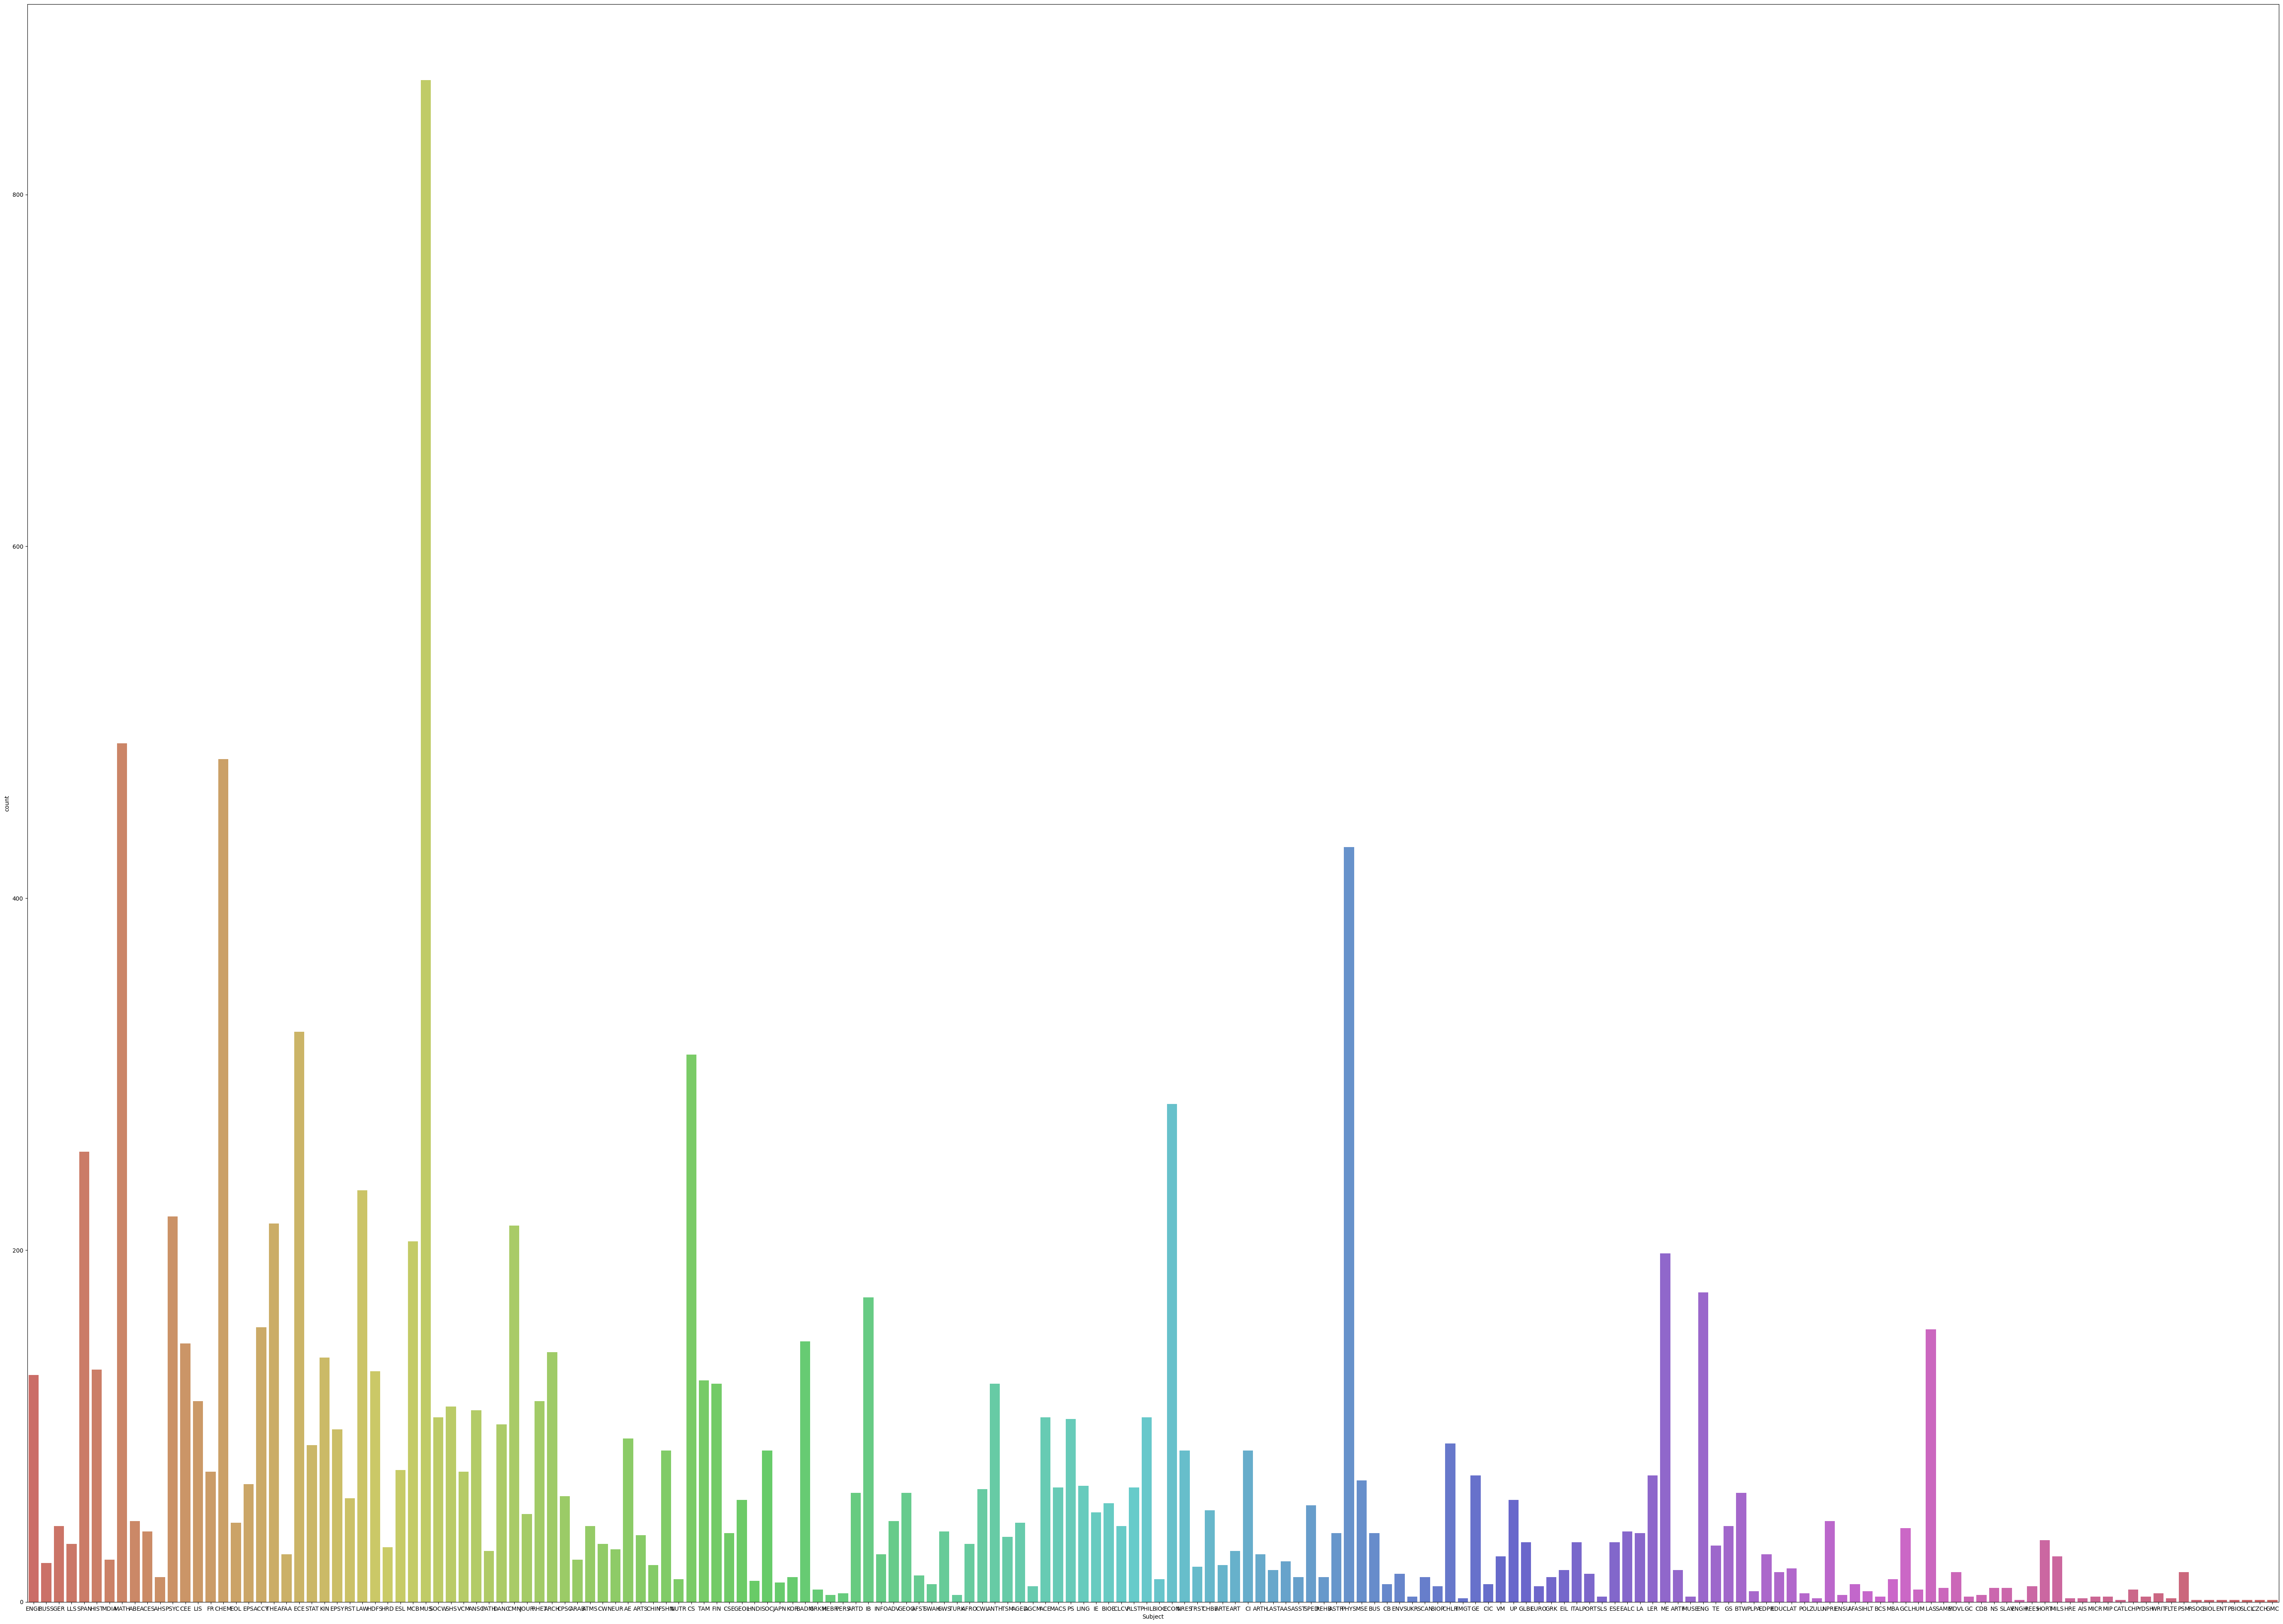

In [37]:
plt.figure(figsize=(70, 50))
sns.countplot(x='Subject', data=courses_df, palette='hls')
plt.xticks(rotation=0)
plt.show()

We found out that the subject musique is the most educated during the year 2016 in fall

In [38]:
fig =go.Figure(data =[go.Bar(x=courses_df['Subject'].value_counts().index, y = courses_df['Subject'].value_counts())])
fig.update_layout(
    title= "Subject Rating",
    xaxis_title= "Subject",
    yaxis_title = 'number of classes'
)



In [39]:
fig =go.Figure(data =[go.Bar(x=courses_df['Section Status'].value_counts().index, y = courses_df['Section Status'].value_counts())])
fig.update_layout(
    title= "Section STatus ",
    xaxis_title= "Section status",
    yaxis_title = 'number of classes'
)



## System of recommandation

### 3- Vectorizing categorical data 

In [40]:
!pip install -U sentence-transformers

In [41]:

# Vectorizing
from sentence_transformers import SentenceTransformer

# Create an instance of SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Compute the sentence embeddings for each phrase in the phrase_column
embeddings = model.encode(courses_df['Subject'], show_progress_bar=False)

# Assign the sentence embeddings to a new column in the DataFrame
courses_df['numerical_column'] = list(embeddings)

# Display the transformed dataframe
courses_df

,Year,Term,Subject,Number,Name,Description,Credit Hours,Section Info,Degree Attributes,Schedule Information,...,Section Credit Hours,Section Status,Type,Start Time,End Time,Days of Week,Room,Building,Instructors,numerical_column
4417,2016,Fall,ENGL,429,18th Century Fiction,Focused study of British and Anglophone fictio...,3 OR 4 hours.,3 undergraduate hours. 4 graduate hours. Prere...,No Degree,No Schedule Information,...,4 hours,A,Lecture-Discussion,1:00 PM,1:50 PM,MWF,115,English Building,"Pollock, A","[-0.04194578, -0.030774945, -0.45018873, 0.068..."
4418,2016,Fall,ENGL,429,18th Century Fiction,Focused study of British and Anglophone fictio...,3 OR 4 hours.,3 undergraduate hours. 4 graduate hours. Prere...,No Degree,No Schedule Information,...,3 hours,A,Lecture-Discussion,1:00 PM,1:50 PM,MWF,115,English Building,"Pollock, A","[-0.04194578, -0.030774945, -0.45018873, 0.068..."
10512,2016,Fall,RUSS,418,18th Century Literature,Reading of texts; historical and literary back...,3 OR 4 hours.,3 undergraduate hours. 4 graduate hours.,No Degree,No Schedule Information,...,4 hours,A,Lecture-Discussion,2:00 PM,4:20 PM,W,1020,Lincoln Hall,"Sobol, V","[-0.04194578, -0.030774945, -0.45018873, 0.068..."
10513,2016,Fall,RUSS,418,18th Century Literature,Reading of texts; historical and literary back...,3 OR 4 hours.,3 undergraduate hours. 4 graduate hours.,No Degree,No Schedule Information,...,3 hours,A,Lecture-Discussion,2:00 PM,4:20 PM,W,1020,Lincoln Hall,"Sobol, V","[-0.04194578, -0.030774945, -0.45018873, 0.068..."
5383,2016,Fall,GER,573,18thC German Studies,"Seminar in selected genres, themes, or authors...",4 hours.,May be repeated to a maximum of 12 hours if to...,No Degree,No Schedule Information,...,No Hr,A,Lecture-Discussion,3:00 PM,4:20 PM,MW,1040,Foreign Languages Building,"Niekerk, C","[-0.04194578, -0.030774945, -0.45018873, 0.068..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5648,2016,Fall,HDFS,529,Youth and Family Acculturation,Examines acculturation in youth and families r...,2 hours.,Prerequisite: Prior coursework in family studi...,No Degree,No Schedule Information,...,No Hr,A,Lecture-Discussion,2:00 PM,4:50 PM,T,242,Bevier Hall,"Ferguson, G","[0.234651, 0.4279614, -0.41962573, -0.8364597,..."
3438,2016,Fall,EALC,132,Zen,Same as RLST 132. See RLST 132.,3 hours.,Same as RLST 132. See RLST 132.,"Hist&Philosoph Perspect, and Non-Western Cultu...",No Schedule Information,...,3 hours,A,Lecture-Discussion,2:00 PM,4:50 PM,F,311,Gregory Hall,"Mayer, A","[0.234651, 0.4279614, -0.41962573, -0.8364597,..."
10402,2016,Fall,RLST,132,Zen,"Introduces the history, teachings, and practic...",3 hours.,Same as EALC 132.,"Hist&Philosoph Perspect, and Non-Western Cultu...",No Schedule Information,...,3 hours,A,Lecture-Discussion,2:00 PM,4:50 PM,F,311,Gregory Hall,"Mayer, A","[0.234651, 0.4279614, -0.41962573, -0.8364597,..."
11833,2016,Fall,VCM,686,ZooMed: What is Your Diagnosis,"A series of interactive, non-domestic animal c...",1 hours.,Approved for S/U grading only. May be repeated...,No Degree,No Schedule Information,...,1 hours,A,Lecture-Discussion,5:00 PM,5:50 PM,MW,100,Veterinary Teaching Hospital,"Welle, K;Whittington, J","[-0.9258416, 0.9155617, -0.8459137, -0.0358561..."


In [42]:
### Methode n° 1 
# small recommandation system

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OneHotEncoder



# Select the relevant columns for item profiles
item_data = courses_df[['Subject', 'Number', 'Name', 'Description', 'Degree Attributes', 'Type', 'Instructors']]


# Vectorize categorical attributes using one-hot encoding
categorical_columns = ['Subject', 'Name','Degree Attributes', 'Type']
vectorized_data = pd.get_dummies(item_data, columns=categorical_columns)

# Concatenate the relevant columns to form item profiles
vectorized_data['ItemProfile'] = vectorized_data.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Create a TF-IDF vectorizer
#TF-IDF will transform the text into meaningful representation of integers or numbers which is used to fit machine learning
#algorithm for predictions. TF-IDF Vectorizer is a measure of originality of a word by comparing the number of times a word
#appears in document with the number of documents the word appears in.
vectorizer = TfidfVectorizer()

# Vectorize the item profiles
item_profiles = vectorizer.fit_transform(vectorized_data['ItemProfile'])

# Calculate the similarity matrix
#The closer the value is to 0 means that the two vectors are orthogonal or perpendicular to each other. 
# When the value is closer to one, it means the angle is smaller and the images are more similar.
similarity_matrix = cosine_similarity(item_profiles, item_profiles)

# Example: Get top recommendations for a specific item
item_index = 1 # Index of the item to get recommendations for
similarity_scores = similarity_matrix[item_index]  # Get similarity scores for the item
top_indices = similarity_scores.argsort()[::-1][1:6]  # Get indices of top similar items (excluding the item itself)

# Print the top recommended items
top_items = item_data.iloc[top_indices]
print("Top Recommendations:")
top_items[['Subject', 'Number', 'Name','Type']]


Top Recommendations:


,Subject,Number,Name,Type
4418,ENGL,429,18th Century Fiction,Lecture-Discussion
4421,ENGL,450,American Lit 1865-1914,Lecture-Discussion
4422,ENGL,450,American Lit 1865-1914,Lecture-Discussion
11181,STAT,391,Honors Individual Study,Independent Study
3358,DANC,199,Undergraduate Open Seminar,Independent Study


In [43]:
# Methode n°2 

#convert a text to a vector

from sentence_transformers import SentenceTransformer



# Select the column for text data
text_column = 'Name'  # Replace with the actual column name

# Get the text data as a list
text_data = courses_df[text_column].tolist()

# Create a SentenceTransformer model
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

# Function to apply the code to each row
def apply_embedding(row):
    embeddings = model.encode([row], show_progress_bar=True)
    return embeddings[0]

# Apply the function to each row in the column
courses_df['Embeddings'] = courses_df[text_column].apply(apply_embedding)

# Print the updated DataFrame
courses_df


Batches: 100%|██████████| 1/1 [00:00<00:00, 14.72it/s]


,Year,Term,Subject,Number,Name,Description,Credit Hours,Section Info,Degree Attributes,Schedule Information,...,Section Status,Type,Start Time,End Time,Days of Week,Room,Building,Instructors,numerical_column,Embeddings
4417,2016,Fall,ENGL,429,18th Century Fiction,Focused study of British and Anglophone fictio...,3 OR 4 hours.,3 undergraduate hours. 4 graduate hours. Prere...,No Degree,No Schedule Information,...,A,Lecture-Discussion,1:00 PM,1:50 PM,MWF,115,English Building,"Pollock, A","[-0.04194578, -0.030774945, -0.45018873, 0.068...","[-0.50484544, -0.5089339, 0.25514445, -1.28059..."
4418,2016,Fall,ENGL,429,18th Century Fiction,Focused study of British and Anglophone fictio...,3 OR 4 hours.,3 undergraduate hours. 4 graduate hours. Prere...,No Degree,No Schedule Information,...,A,Lecture-Discussion,1:00 PM,1:50 PM,MWF,115,English Building,"Pollock, A","[-0.04194578, -0.030774945, -0.45018873, 0.068...","[-0.50484544, -0.5089339, 0.25514445, -1.28059..."
10512,2016,Fall,RUSS,418,18th Century Literature,Reading of texts; historical and literary back...,3 OR 4 hours.,3 undergraduate hours. 4 graduate hours.,No Degree,No Schedule Information,...,A,Lecture-Discussion,2:00 PM,4:20 PM,W,1020,Lincoln Hall,"Sobol, V","[-0.04194578, -0.030774945, -0.45018873, 0.068...","[-0.4705535, -0.41277257, 0.15835619, -1.18446..."
10513,2016,Fall,RUSS,418,18th Century Literature,Reading of texts; historical and literary back...,3 OR 4 hours.,3 undergraduate hours. 4 graduate hours.,No Degree,No Schedule Information,...,A,Lecture-Discussion,2:00 PM,4:20 PM,W,1020,Lincoln Hall,"Sobol, V","[-0.04194578, -0.030774945, -0.45018873, 0.068...","[-0.4705535, -0.41277257, 0.15835619, -1.18446..."
5383,2016,Fall,GER,573,18thC German Studies,"Seminar in selected genres, themes, or authors...",4 hours.,May be repeated to a maximum of 12 hours if to...,No Degree,No Schedule Information,...,A,Lecture-Discussion,3:00 PM,4:20 PM,MW,1040,Foreign Languages Building,"Niekerk, C","[-0.04194578, -0.030774945, -0.45018873, 0.068...","[-0.96452206, 0.35248625, 0.15516844, -0.75426..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5648,2016,Fall,HDFS,529,Youth and Family Acculturation,Examines acculturation in youth and families r...,2 hours.,Prerequisite: Prior coursework in family studi...,No Degree,No Schedule Information,...,A,Lecture-Discussion,2:00 PM,4:50 PM,T,242,Bevier Hall,"Ferguson, G","[0.234651, 0.4279614, -0.41962573, -0.8364597,...","[-0.25038618, -0.6849925, 0.48392728, -0.79587..."
3438,2016,Fall,EALC,132,Zen,Same as RLST 132. See RLST 132.,3 hours.,Same as RLST 132. See RLST 132.,"Hist&Philosoph Perspect, and Non-Western Cultu...",No Schedule Information,...,A,Lecture-Discussion,2:00 PM,4:50 PM,F,311,Gregory Hall,"Mayer, A","[0.234651, 0.4279614, -0.41962573, -0.8364597,...","[-0.37958145, -0.009607837, 1.24371, -0.576014..."
10402,2016,Fall,RLST,132,Zen,"Introduces the history, teachings, and practic...",3 hours.,Same as EALC 132.,"Hist&Philosoph Perspect, and Non-Western Cultu...",No Schedule Information,...,A,Lecture-Discussion,2:00 PM,4:50 PM,F,311,Gregory Hall,"Mayer, A","[0.234651, 0.4279614, -0.41962573, -0.8364597,...","[-0.37958145, -0.009607837, 1.24371, -0.576014..."
11833,2016,Fall,VCM,686,ZooMed: What is Your Diagnosis,"A series of interactive, non-domestic animal c...",1 hours.,Approved for S/U grading only. May be repeated...,No Degree,No Schedule Information,...,A,Lecture-Discussion,5:00 PM,5:50 PM,MW,100,Veterinary Teaching Hospital,"Welle, K;Whittington, J","[-0.9258416, 0.9155617, -0.8459137, -0.0358561...","[-1.0137306, -0.33279383, 0.9018123, -0.293380..."


In [44]:
embed_data = embeddings


In [45]:
 #reduce the dimensionality of our dataset (Principal Components Analysis) 
from sklearn.decomposition import PCA

X = np.array(embed_data)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,0.508131,-0.479681,2.217079,-0.906102,0.123423
1,0.508131,-0.479681,2.217079,-0.906102,0.123423
2,0.508131,-0.479681,2.217079,-0.906102,0.123423
3,0.508131,-0.479681,2.217079,-0.906102,0.123423
4,0.508131,-0.479681,2.217079,-0.906102,0.123423


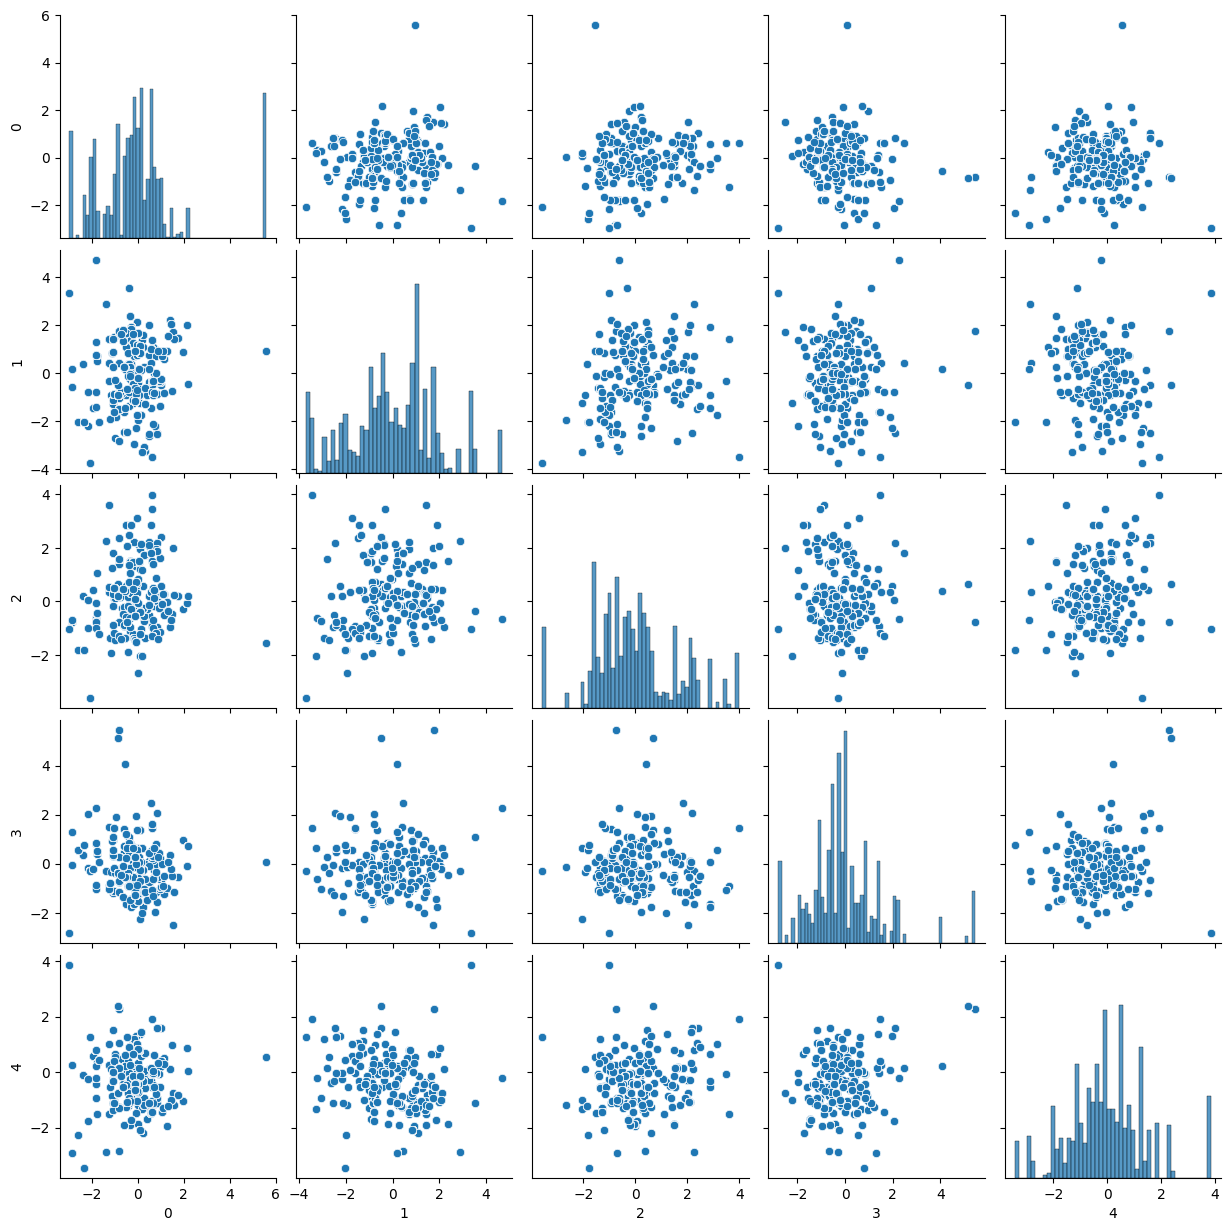

In [46]:
sns.pairplot(pca_data)

## Cosine Similarity and Recommendation Function
####  compute the cosine similarity (one line of code) and the function that we’ll use to get our recommendations:

In [47]:

from sklearn.metrics.pairwise import cosine_similarity

cos_sim_data = pd.DataFrame(cosine_similarity(X))
def give_recommendations(index,print_recommendation = False,print_recommendation_plots= False,print_genres =False):
  index_recomm =cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]
  class_recomm =  courses_df['Name'].loc[index_recomm].values
  result = {'Classes':class_recomm,'Index':index_recomm}
  if print_recommendation==True:
    print('The attending class is this one: %s \n'%(courses_df['Name'].loc[index]))
    k=1
    for classe in class_recomm:
      print('The number %i recommended class is this one: %s \n'%(k,classe))
      k=k+1
  if print_recommendation_plots==True:
    print('The plot of the attended class is this one:\n %s \n'%(courses_df['Description'].loc[index]))
    k=1
    for q in range(len(class_recomm)):
      plot_q = courses_df['Description'].loc[index_recomm[q]]
      print('The plot of the number %i recommended class is this one:\n %s \n'%(k,plot_q))
      k=k+1
  if print_genres==True:
    print('The genres of the attended class is this one:\n %s \n'%(courses_df['Type'].loc[index]))
    k=1
    for q in range(len(class_recomm)):
      plot_q = courses_df['Type'].loc[index_recomm[q]]
      print('The plot of the number %i recommended class is this one:\n %s \n'%(k,plot_q))
      k=k+1
  return result

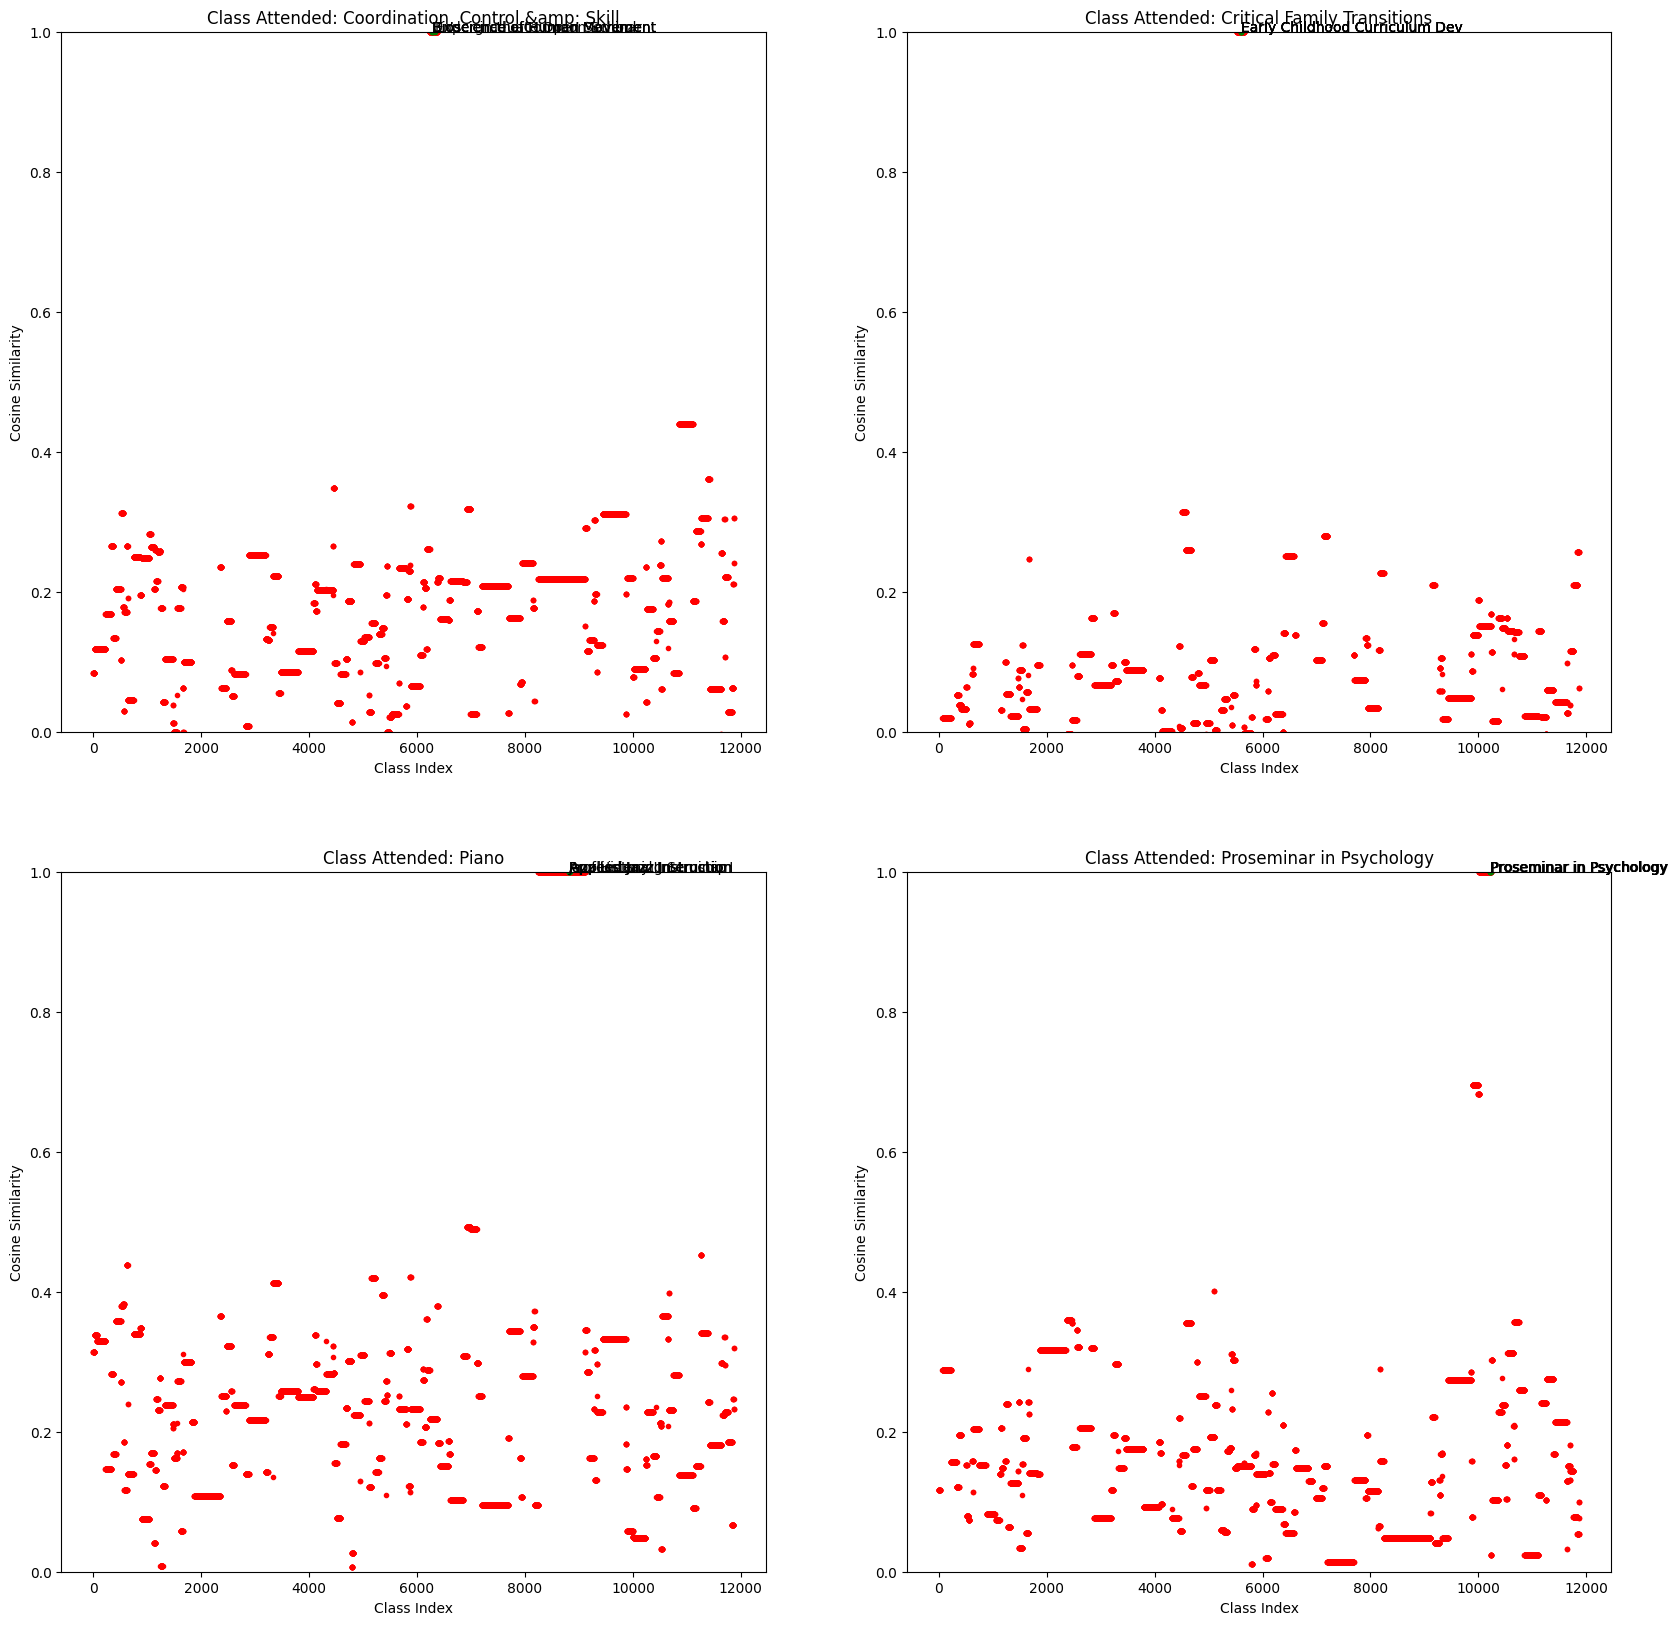

In [48]:
plt.figure(figsize=(20,20))
for q in range(1,5):
  plt.subplot(2,2,q)
  index = np.random.choice(np.arange(0,len(X)))
  to_plot_data = cos_sim_data.drop(index,axis=1)
  plt.plot(to_plot_data.loc[index],'.',color='red')
  recomm_index = give_recommendations(index)
  x = recomm_index['Index']
  y = cos_sim_data.loc[index][x].tolist()
  m = recomm_index['Classes']
  plt.plot(x,y,'.',color='green',label='Recommended Classes')
  plt.title('Class Attended: '+courses_df['Name'].loc[index])
  plt.xlabel('Class Index')
  k=0
  for i in x:
    plt.annotate('%s'%(m[k]),(i,y[k]),fontsize=10)
    k=k+1

  plt.ylabel('Cosine Similarity')
  plt.ylim(0,1)

In [49]:
give_recommendations(2,True)

The attending class is this one: Intro Asian American Studies 

The number 1 recommended class is this one: Asian Families in America 

The number 2 recommended class is this one: Asian American Education 

The number 3 recommended class is this one: Asian American Education 

The number 4 recommended class is this one: Intro Asian American Studies 

The number 5 recommended class is this one: Prisons, Race, and Terror 



{'Classes': array(['Asian Families in America', 'Asian American Education',
        'Asian American Education', 'Intro Asian American Studies',
        'Prisons, Race, and Terror'], dtype=object),
 'Index': [12, 22, 21, 1, 19]}

In [50]:
give_recommendations(2,False,True)

The plot of the attended class is this one:
 Interdisciplinary introduction to the basic concepts and approaches in Asian American Studies. Surveys the various dimensions of Asian American experiences including history, social organization, literature, arts, and politics. 

The plot of the number 1 recommended class is this one:
 Same as HDFS 221 and SOCW 297. See SOCW 297. 

The plot of the number 2 recommended class is this one:
 Same as EPS 402. See EPS 402. 

The plot of the number 3 recommended class is this one:
 Same as EPS 402. See EPS 402. 

The plot of the number 4 recommended class is this one:
 Interdisciplinary introduction to the basic concepts and approaches in Asian American Studies. Surveys the various dimensions of Asian American experiences including history, social organization, literature, arts, and politics. 

The plot of the number 5 recommended class is this one:
 Examination of the U.S. prison regime, focusing on three dimensions of U.S. imprisonment -- crimina

{'Classes': array(['Asian Families in America', 'Asian American Education',
        'Asian American Education', 'Intro Asian American Studies',
        'Prisons, Race, and Terror'], dtype=object),
 'Index': [12, 22, 21, 1, 19]}

In [51]:
give_recommendations(10,True,True)

The attending class is this one: Muslims in America 

The number 1 recommended class is this one: Asian Families in America 

The number 2 recommended class is this one: Asian American Education 

The number 3 recommended class is this one: Asian American Education 

The number 4 recommended class is this one: Intro Asian American Studies 

The number 5 recommended class is this one: Prisons, Race, and Terror 

The plot of the attended class is this one:
 Introduction to the study of Muslims in the United States and broadly the history of Islam in the Americas. Using a comparative approach, we study how the historical narrative of African American and Latino Muslims relates to newer immigrant populations, primarily Arab American and South Asian American Muslim communities. Same as LLS 258 and RLST 258. 

The plot of the number 1 recommended class is this one:
 Same as HDFS 221 and SOCW 297. See SOCW 297. 

The plot of the number 2 recommended class is this one:
 Same as EPS 402. See EP

{'Classes': array(['Asian Families in America', 'Asian American Education',
        'Asian American Education', 'Intro Asian American Studies',
        'Prisons, Race, and Terror'], dtype=object),
 'Index': [12, 22, 21, 1, 19]}

In [52]:
give_recommendations(65,True,True,True)

The attending class is this one: Graduate Research I 

The number 1 recommended class is this one: Applied Statistical Methods I 

The number 2 recommended class is this one: Environmental Soil Physics 

The number 3 recommended class is this one: Statistical Methods 

The number 4 recommended class is this one: Applied Statistical Methods I 

The number 5 recommended class is this one: Applied Statistical Methods I 

The plot of the attended class is this one:
 Basic research orientation, research methods, presentation skills, laboratory practices, case studies, and professional and ethical conduct. 

The plot of the number 1 recommended class is this one:
 Same as ANSC 440, CPSC 440, FSHN 440, and NRES 440. See CPSC 440. 

The plot of the number 2 recommended class is this one:
 Provides the theoretical basis for understanding and quantifying the physical, hydrological, geotechnical, and thermal properties of soil in relation to environmental processes. Topics include general soil pr

{'Classes': array(['Applied Statistical Methods I', 'Environmental Soil Physics',
        'Statistical Methods', 'Applied Statistical Methods I',
        'Applied Statistical Methods I'], dtype=object),
 'Index': [44, 50, 49, 48, 47]}

In [53]:
recomm_list = []
for i in range(len(X)):
  recomm_i = give_recommendations(i)
  recomm_list.append(recomm_i['Classes'])
recomm_data = pd.DataFrame(recomm_list,columns=['First Recommendation','Second Recommendation','Third Recommendation','Fourth Recommendation','Fifth Recommendation'])
recomm_data['Attended_Class'] = courses_df['Name']
recomm_data = recomm_data[['Attended_Class','First Recommendation','Second Recommendation','Third Recommendation','Fourth Recommendation','Fifth Recommendation']]

In [54]:
recomm_data.sample(frac=1).head(2)

,Attended_Class,First Recommendation,Second Recommendation,Third Recommendation,Fourth Recommendation,Fifth Recommendation
4700,Environmental Writing,History of Life,Environmental Writing,Environment &amp; Sustainability Field Study,Environment &amp; Sustainability Field Study,History of the Earth System
397,Internship Seminar,Advertising and Brand Strategy,UG Research Project,Internship Seminar,Internship Seminar,Advanced Special Topics in Advertising


In [55]:
recomm_data.to_csv("recomm_data.csv")

In [56]:
recomm_data.drop_duplicates()

,Attended_Class,First Recommendation,Second Recommendation,Third Recommendation,Fourth Recommendation,Fifth Recommendation
0,Intro Asian American Studies,Asian Families in America,Asian American Education,Asian American Education,Intro Asian American Studies,"Prisons, Race, and Terror"
8,U.S. Race and Empire,Asian Families in America,Asian American Education,Asian American Education,Intro Asian American Studies,"Prisons, Race, and Terror"
9,Asian American Youth in Film,Asian Families in America,Asian American Education,Asian American Education,Intro Asian American Studies,"Prisons, Race, and Terror"
10,Muslims in America,Asian Families in America,Asian American Education,Asian American Education,Intro Asian American Studies,"Prisons, Race, and Terror"
11,Food and Asian Americans,Asian Families in America,Asian American Education,Asian American Education,Intro Asian American Studies,"Prisons, Race, and Terror"
...,...,...,...,...,...,...
11862,Writing Across Media,Writing Across Media,Writing Across Media,Writing Across Media,Writing Across Media,Freshman Honors Tutorial
11866,Intermediate Yiddish I,Jewish Storytelling,Lit Responses to the Holocaust,Elementary Persian I,Elementary Persian I,Intermediate Persian I
11867,Jewish Storytelling,Jewish Storytelling,Lit Responses to the Holocaust,Elementary Persian I,Elementary Persian I,Intermediate Persian I
11868,Lit Responses to the Holocaust,Jewish Storytelling,Lit Responses to the Holocaust,Elementary Persian I,Elementary Persian I,Intermediate Persian I


In [63]:
courses_df_new = courses_df

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000, stop_words='english')

In [64]:
courses_df_new['Description'].fillna('', inplace=True)
X_array = cv.fit_transform(courses_df_new['Description']).toarray()
print(X_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 2 0]]


In [66]:
X_array[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
cv.get_feature_names()

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

#### the cost function uses mean squared error (MSE) as the metric to measure the difference between predicted and target values. 

In [ ]:
from sklearn.preprocessing import LabelEncoder
targets = recomm_data['Attended Class']

# Extract recommended classes (predictions) from recomm_data DataFrame
predictions = recomm_data[['First Recommendation']]
# Create LabelEncoder object
label_encoder = LabelEncoder()

# Check for unseen labels in predictions and targets
all_labels = set(predictions).union(set(targets))

# Fit LabelEncoder on all_labels to ensure consistency
label_encoder.fit(list(all_labels))

# Encode predictions and targets
encoded_predictions = label_encoder.transform(predictions)
encoded_targets = label_encoder.transform(targets)

# Print encoded predictions and targets
print("Encoded Predictions:")
print(encoded_predictions)
print("\nEncoded Targets:")
print(encoded_targets)

# Calculate and print the cost
cost = cost_function(encoded_predictions, encoded_targets)
print("Cost:", cost)
